# Unit test data
## Create small image for function test
```python
ff = os.path.join(im_dir, full_im)
os_obj = openslide.OpenSlide(ff)
print(os_obj.dimensions)
small_im = os_obj.associated_images['thumbnail']
print(small_im.size)
small_im_name = 'CMU-1-small_im.png'
small_im_full_name = os.path.join(im_dir, small_im_name)
small_im.save(small_im_full_name)
```
(2220, 2967) <br>
(574, 768) <br>
****
## Test: *get_sample_selection_mask(small_im, patch_select_method)*


In [2]:
import os
from tempfile import TemporaryDirectory
import argparse

import numpy as np
import yaml
from skimage.filters import threshold_otsu
from skimage.color import rgb2lab
import openslide

import PIL
from PIL import ImageDraw
from PIL.Image import Image
from PIL.ImageStat import Stat

im_dir = '../data/images/'
full_im = 'CMU-1-Small-Region.svs'
small_im_name = 'CMU-1-small_im.png'
small_im_full_name = os.path.join(im_dir, small_im_name)

os.listdir(im_dir)

['threshold_rgb2lab_mask.png',
 'threshold_otsu_mask.png',
 'CMU-1-small_im.png',
 'CMU-1-Small-Region.svs']

## Method to test: *get_sample_selection_mask(small_im, patch_select_method)*
* Call with small image and patch select method
* Compare returned image to saved image


In [2]:
def get_sample_selection_mask(small_im, patch_select_method):
    """ get an image mask """
    mask_im = None
    
    if patch_select_method == 'threshold_rgb2lab':
        thresh = 80
        np_img = np.array(small_im.convert('RGB'))
        np_img = rgb2lab(np_img)
        np_img = np_img[:,:,0]
        mask_im = np.array(np_img) < thresh
        mask_im = PIL.Image.fromarray(np.uint8(mask_im) * 255)
        
    elif patch_select_method == 'threshold_otsu':
        grey_thumbnail = np.array(small_im.convert('L'))
        thresh = threshold_otsu(grey_thumbnail)
        mask_im = np.array(grey_thumbnail) < thresh
        mask_im = PIL.Image.fromarray(np.uint8(mask_im) * 255)

    else:
        print('patch_select_method %s not implemented'%(patch_select_method))

    return mask_im

In [25]:
small_im_name = 'CMU-1-small_im.png'
small_im_full_name = os.path.join(im_dir, small_im_name)
sm_im = PIL.Image.open(small_im_full_name)

patch_select_method_list = ['threshold_rgb2lab', 'threshold_otsu']

rgb_mask_name = os.path.join(im_dir, 'threshold_rgb2lab_mask.png')
rgb_mask_truth = PIL.Image.open(rgb_mask_name)
mask_rgb = get_sample_selection_mask(small_im, patch_select_method_list[0])

rgb_truth_arr = np.array(rgb_mask_truth)
rgb_funct_arr = np.array(mask_rgb)
print((rgb_truth_arr - rgb_funct_arr).sum())

otsu_mask_name = os.path.join(im_dir, 'threshold_otsu_mask.png')
otsu_mask_truth = PIL.Image.open(otsu_mask_name)
mask_otsu = get_sample_selection_mask(small_im, patch_select_method_list[1])

otsu_truth_arr = np.array(otsu_mask_truth)
otsu_funct_arr = np.array(mask_otsu)
print((otsu_truth_arr - otsu_funct_arr).sum())


0
0


In [7]:
from PIL.Image import Image
small_im_name = 'CMU-1-small_im.png'
small_im_full_name = os.path.join(im_dir, small_im_name)

small_im = PIL.Image.open(small_im_full_name)



## make and display the mask result images

In [13]:
small_im_name = 'CMU-1-small_im.png'
small_im_full_name = os.path.join(im_dir, small_im_name)
sm_im = PIL.Image.open(small_im_full_name)

patch_select_method_list = ['threshold_rgb2lab', 'threshold_otsu']

(574, 768)


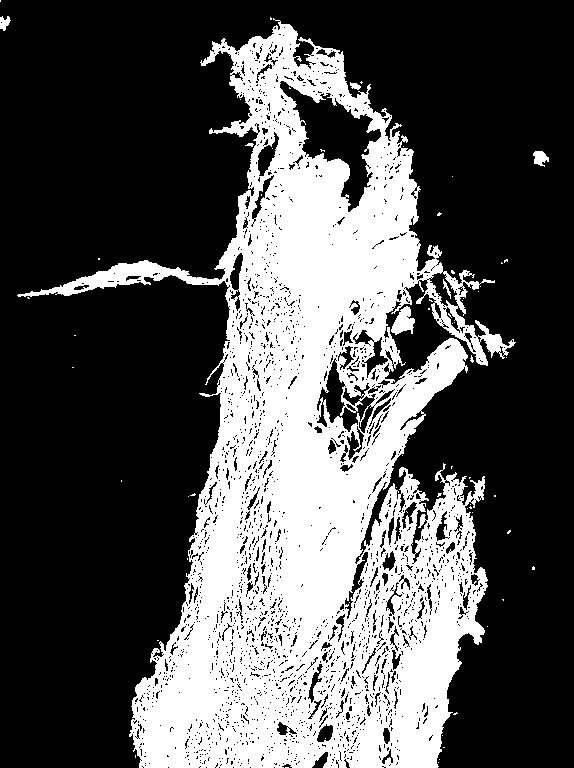

In [20]:
mask_rgb = get_sample_selection_mask(small_im, patch_select_method_list[0])
rgb_mask_name = os.path.join(im_dir, 'threshold_rgb2lab_mask.png')
mask_rgb.save(rgb_mask_name)
display(mask_rgb)

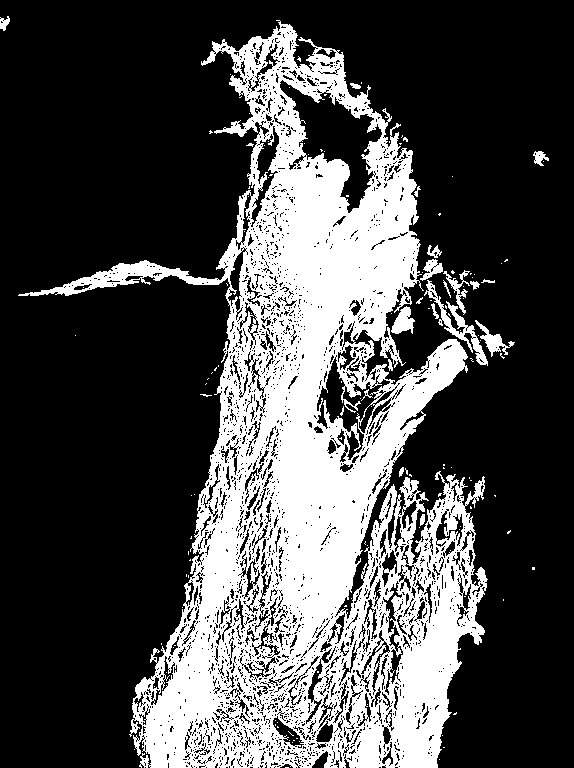

In [21]:
mask_otsu = get_sample_selection_mask(small_im, patch_select_method_list[1])
otsu_mask_name = os.path.join(im_dir, 'threshold_otsu_mask.png')
mask_otsu.save(otsu_mask_name)
display(mask_otsu)